In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.datasets import cifar10, mnist
from resnet34 import ResNet34

## load cifar10 data

In [6]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
num_classes = 10
input_shape = X_train[0].shape
print(input_shape)
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train /= 255
X_test /= 255
Y_train = keras.utils.np_utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.np_utils.to_categorical(Y_test, num_classes)


(28, 28)


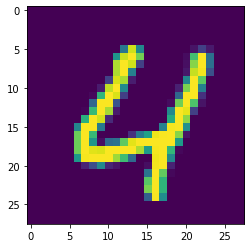

4


In [7]:
num = 64
plt.imshow(X_train[num])
plt.show()
print(np.argmax(Y_train[num]))

In [9]:
model = ResNet34(latent=1024, n_classes=num_classes, activation='softmax')
model.build(input_shape=(1, *X_train[0].shape))
model.summary(X_train[0].shape)


2022-06-16 23:01:25.503449: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 23:01:25.535091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 23:01:25.535251: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 23:01:25.535735: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=256, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20


2022-06-16 23:01:35.952129: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400
2022-06-16 23:01:36.910020: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


188/188 [==============================] - 9s 29ms/step - loss: 2.1272 - accuracy: 0.5287 - val_loss: 2.3135 - val_accuracy: 0.0914
Epoch 2/20
188/188 [==============================] - 5s 25ms/step - loss: 1.9003 - accuracy: 0.5521 - val_loss: 1.9186 - val_accuracy: 0.4557
Epoch 3/20
188/188 [==============================] - 5s 25ms/step - loss: 1.7054 - accuracy: 0.5605 - val_loss: 1.9377 - val_accuracy: 0.3653
Epoch 4/20
188/188 [==============================] - 5s 25ms/step - loss: 1.5429 - accuracy: 0.5609 - val_loss: 1.4895 - val_accuracy: 0.5657
Epoch 5/20
188/188 [==============================] - 5s 25ms/step - loss: 1.3740 - accuracy: 0.5734 - val_loss: 1.3280 - val_accuracy: 0.5798
Epoch 6/20
188/188 [==============================] - 5s 25ms/step - loss: 1.3113 - accuracy: 0.5485 - val_loss: 1.3365 - val_accuracy: 0.5197
Epoch 7/20
188/188 [==============================] - 5s 25ms/step - loss: 1.1971 - accuracy: 0.5683 - val_loss: 1.2259 - val_accuracy: 0.5612
Epoch 8/20

In [ ]:
model.evaluate(X_test, Y_test, verbose=1)